In [2]:
import math
import sklearn
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import block_reduce
import glob

In [3]:
#ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tiffs for PCA degridding/*.tif")]
horizontal_number = 11 
vertical_number = 19

In [3]:
ims_downscaled = []
for i in range(len(ims)):
    #print(i)
    ims_downscaled.append((skimage.transform.downscale_local_mean(ims[i], (4,4))).flatten())
ims_downscaled_array = np.array(ims_downscaled)    


    

In [7]:
ims = 0

In [6]:

for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = ims_downscaled[pos_in_list].reshape(512,768)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
ims_downscaled = 0
ims_downscaled_array = 0

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11


In [13]:
#Checking outcomes

ims_downscaled_array = np.array([plt.imread(path) for path in glob.glob("C:/Users/rwfbl/brightness matcher testing/*.png")])*256*256

In [14]:
inboard_tile_numbers = [] #Numbers for the tiles which are considered "inboard", those which are at least 90% sample
black_tile_numbers = [] #Numbers for the tiles which are considered "black", those which are at least 90% empty space without plag
edge_tile_numbers = [] #Numbers for the tiles which are considered "edges", those which are between 
black_masks = []
bright_masks = []
plag_masks = []

black_threshold = 105
bright_threshold = 133

for i in range(len(ims_downscaled_array)):
    black_masks.append(ims_downscaled_array[i]<black_threshold)
    bright_masks.append(ims_downscaled_array[i]>bright_threshold)
    plag_masks.append((black_threshold<ims_downscaled_array[i]) & (ims_downscaled_array[i]<bright_threshold))
    if np.mean(black_masks[i]) > 0.9:
        black_tile_numbers.append(i)
    elif np.mean(black_masks[i]) <0.1:
        inboard_tile_numbers.append(i)
    else:
        edge_tile_numbers.append(i)
    
black_masks = np.array(black_masks)
bright_masks = np.array(bright_masks)
plag_masks = np.array(plag_masks)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [11]:
ims_downscaled_array

array([], dtype=float64)

In [60]:
plag_masks[17] == (1-black_masks[17])*(1-bright_masks[17])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [68]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values
inboard_downscaled_masked = []
for i in inboard_tile_numbers:
    sample_values = ims_downscaled_array[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_masked.append((fitting_array+sample_values).flatten())
    print(sample_mean, sample_deviation)
inboard_downscaled_masked = np.array(inboard_downscaled_masked)

120.22915 3.7327309
120.26995 3.6648462
120.12832 3.8423264
120.50621 3.525863
120.574905 3.5289242
120.36549 3.5745456
120.21092 3.8722208
120.29262 3.6307645
120.556946 3.532109
120.358925 4.028234
120.433914 3.6052747
119.95796 3.8830636
120.12084 3.7427077
120.378334 3.7094622
119.56197 4.6229944
120.072586 3.8575351
120.26997 4.003933
120.38551 3.9303946
120.106415 4.2453365
120.14737 4.0348697
120.16448 4.1668143
120.29709 4.07607
120.36917 4.1545496
120.46789 3.9666367
119.90609 4.375283
119.43197 4.6958594
119.952415 4.329206
120.47806 4.0477686
120.35521 4.1011534
120.1222 4.3719063
119.85498 4.325536
120.056984 4.414257
120.40611 4.1544614
120.30115 4.438807
120.13773 4.61216
119.93788 4.5307374
120.10423 4.286947
120.218956 4.3365436
120.22537 4.2778435
120.26909 4.4010124
120.36687 4.35968
119.52527 4.8444943
120.28771 4.31939
120.66165 4.022216
120.49934 4.0373335
120.42359 4.3679852
120.13578 4.483541
120.76629 4.138574
119.889946 4.492426
120.48739 4.3856583
120.22332 4.

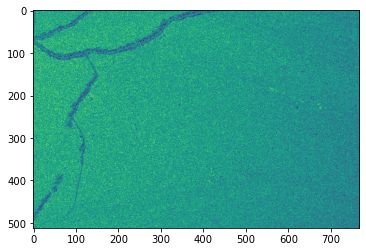

In [62]:
plt.imshow(inboard_downscaled_masked[1].reshape(512,768))

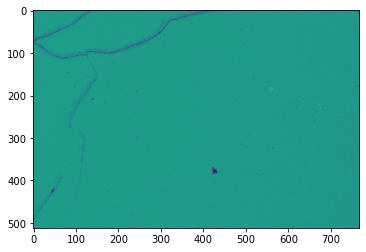

In [63]:
plt.imshow(ims_downscaled_array[inboard_tile_numbers[1]].reshape(512,768))

In [6]:
1-black_masks[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [36]:
are_you_sure = 0
if are_you_sure == 1:
    full_set = pd.Series(ims_downscaled_array.flatten())
    black_example = pd.Series(ims_downscaled[1].flatten())
    plain_example = pd.Series(ims_downscaled[36].flatten())
    bright_example = pd.Series(ims_downscaled[3].flatten())

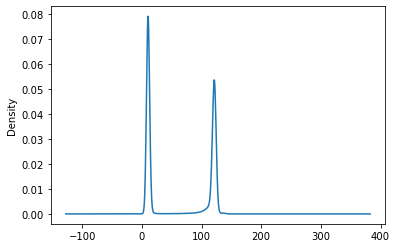

In [35]:
#ax = full_set.plot.kde()

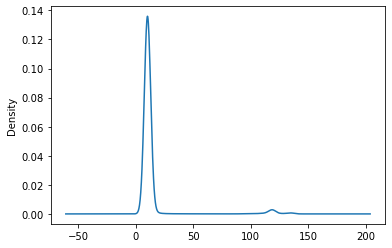

In [27]:
#ax = black_example.plot.kde()

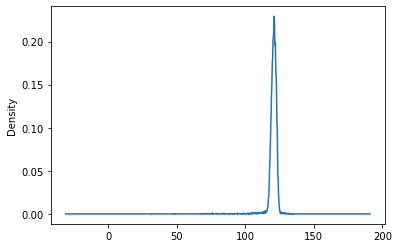

In [43]:
ax = plain_example.plot.kde(bw_method = 0.01)

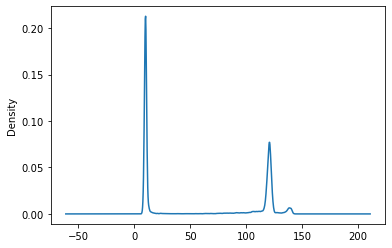

In [42]:
ax = bright_example.plot.kde(bw_method = 0.01)

In [69]:
pca = PCA(n_components=15)
pca.fit(inboard_downscaled_masked)

PCA(n_components=15)

In [72]:
np.mean(pca.mean_.reshape(512,768))

120.34898747672139

In [81]:
np.min(pca.mean_)

116.12823963283336

In [85]:
new_processing_approach_tiffs = []
black_mask_reapplied = []

mean_contrast = pca.mean_.reshape(512,768) - np.mean(pca.mean_)
mean_subtracted = ims_downscaled_array-mean_contrast
for i in range(len(ims_downscaled_array)):
    mean_subtracted_masked = np.zeros(ims_downscaled_array[i].shape)
    mean_subtracted_masked[black_masks[i] == False] = mean_subtracted[i][black_masks[i] == False]
    mean_subtracted_masked[black_masks[i] == True] = ims_downscaled_array[i][black_masks[i] == True]
    black_mask_reapplied.append(mean_subtracted_masked) 
    
    

In [96]:
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = (black_mask_reapplied[pos_in_list].reshape(512,768))*256
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('new_degrid_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('new_degrid_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('new_degrid_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('new_degrid_'+str(i+1)+'_0'+str(j+1)+'.png')

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11


In [94]:
black_mask_reapplied[2][black_mask_reapplied[2]<2]

array([1.00001526, 1.00001526, 0.        , 1.00001526, 1.00001526,
       1.00001526, 1.00001526, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.00001526, 0.        , 0.        , 0.        ,
       0.        , 1.00001526, 1.00001526, 0.        , 1.00001526,
       0.        , 0.        ])

In [90]:
mean_contrast

array([[ 0.53026364,  1.11104241,  0.32427321, ..., -1.93989774,
        -1.96168536, -2.70944632],
       [ 1.60681166,  1.57566516,  1.38076601, ..., -2.05584234,
        -2.52023872, -0.93525702],
       [ 1.85199079,  1.18669243,  1.62787371, ..., -1.63022845,
        -2.46950994, -2.20614094],
       ...,
       [ 0.64535616,  1.08841053,  0.30797554, ..., -2.90581924,
        -2.83925869, -2.56629106],
       [ 1.32227671,  0.42071294, -0.43277375, ..., -3.49533979,
        -3.21967747, -3.50990079],
       [ 0.61960167,  0.90103798,  0.49135408, ..., -3.35735072,
        -3.10276174, -3.9176746 ]])

In [7]:
#below_cutoff = [] #for old brightness fixing

In [8]:
#for i in range(len(ims_downscaled[0])):  #for old brightness fixing
#    if ims_downscaled[0][i]<15:
#        below_cutoff.append(ims_downscaled[0][i])

In [8]:
#below_cutoff

In [9]:
#(skimage.transform.downscale_local_mean(ims[1], (4,4))).flatten()

In [11]:
#ims_downscaled_array[13][0] = 255
#to_save = Image.fromarray(ims_downscaled_array[13].reshape(512,768))
#print(to_save)
#to_save.save('tiffnesstest.tif')

In [12]:
#does_imaging_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_imaging_break_it = np.array(does_imaging_break_it)
#does_imaging_break_it


In [13]:
#does_saving_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_saving_break_it.save('does_saving_break_it.tif')
#beep_boop = plt.imread('does_saving_break_it.tif')
#np.array(beep_boop)

In [14]:
print(np.mean(ims_downscaled_array[13]))
testing_thresholding = np.array(more_processed_tifs[12])
lower_threshold = 90 *256
upper_threshold = 140 *256
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)
testing_thresholding = testing_thresholding.astype(np.uint16)
testing_thresholding = Image.fromarray(testing_thresholding)
#testing_thresholding.save('1_comps_removed_inboard.png')

120.00251213709514


NameError: name 'more_processed_tifs' is not defined

In [ ]:
testing_thresholding = np.array(more_processed_tifs[13])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
lower_threshold = 80 *256
upper_threshold = 120 *256
testing_thresholding = np.array(even_more_processed_tifs[12])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
#plt.imshow(Image.fromarray(np.array(processed_tifs[12])-np.array(more_processed_tifs[12])))

In [10]:
ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
ipca_tiffs = ipca.fit_transform(ims_downscaled_array)

In [ ]:
ims_downscaled_array_copy = ims_downscaled_array.copy()
for i in range(len(ims_downscaled_array_copy)):
    mean = np.mean(ims_downscaled_array_copy[i])
    ims_downscaled_array_copy[i][ims_downscaled_array_copy[i]<40] = 120

plt.imshow(ims_downscaled_array_copy[12].reshape(512,768))

In [ ]:
thresholded_ipca = IncrementalPCA(n_components=100, batch_size=horizontal_number*vertical_number)
thresholded_ipca_tifs = thresholded_ipca.fit_transform(ims_downscaled_array_copy)

In [ ]:
#ipca.explained_variance_ratio_
plt.imshow(ipca.mean_.reshape(512,768))

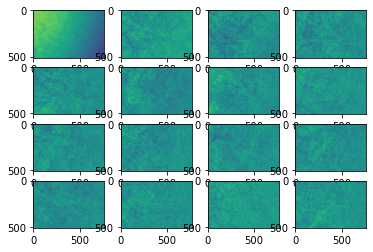

In [66]:
#Plotting the components next to eachother
fig, axs = plt.subplots(4,4)
#axs[0,0].imshow(thresholded_ipca.mean_.reshape(512,768))
#for i in range(15):
#    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(thresholded_ipca.components_[i].reshape(512,768))
axs[0,0].imshow(pca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(pca.components_[i].reshape(512,768))
plt.savefig('PCA components.svg', dpi = 500)

In [19]:
plt.savefig('PCA components for poster.svg', dpi = 500)

<Figure size 432x288 with 0 Axes>

In [87]:
nmf_model = NMF(n_components = 15, init='random', random_state = 0, max_iter = 1000)
nmf_fitted = nmf_model.fit_transform(ims_downscaled_array)
nmf_components = nmf_model.components_

C:\Users\rwfbl\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [235]:
thresholded_ipca.mean_

array([70.93854776, 71.28259909, 71.08956635, ..., 70.94344684,
       71.03426735, 70.88713267])

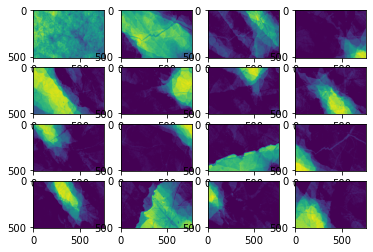

In [88]:
fig, axs = plt.subplots(4,4)
axs[0,0].imshow(ipca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(nmf_components[i].reshape(512,768))
plt.savefig('NMF components for Jmac to see.png', dpi = 500)

In [125]:
plt.imshow((ipca.mean_.reshape(512,768)))
ipca_tiffs[0]

AttributeError: 'float' object has no attribute 'reshape'

In [124]:
for i in range(len(ipca_tiffs)):
    ipca_tiffs[i][0] = 0
    ipca_tiffs[i][1] = 0
    ipca_tiffs[i][2] = 0
    ipca_tiffs[i][3] = 0
component_stripped = ipca.inverse_transform(ipca_tiffs)
plt.imshow(component_stripped[15].reshape(512,768))
to_save = Image.fromarray(component_stripped[15].reshape(512,768))
to_save.save('four_comps_removed_example_pca.png')

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [122]:
for i in range(len(nmf_fitted)):
    nmf_fitted[i][0] = 0
    nmf_fitted[i][1] = 0
    nmf_fitted[i][2] = 0
    nmf_fitted[i][3] = 0
component_stripped = NMF.inverse_transform(nmf_model, W=nmf_fitted)
plt.imshow(component_stripped[15].reshape(512,768))

MemoryError: Unable to allocate 627. MiB for an array with shape (209, 393216) and data type float64

In [51]:


#test = Image.fromarray(ims_downscaled_array[101].reshape(512,768)-ipca.mean_.reshape(512,768))
#plt.imshow(test)

In [52]:
#plt.imshow(ims_downscaled_array[101].reshape(512,768))

In [53]:
#test.save('test.tif')

In [162]:
processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        processed_tifs.append(to_save)

1 1
-47
1 2
-47
1 3
-48
1 4
-47
1 5
-47
1 6
-47
1 7
-47
1 8
-47
1 9
-47
1 10
-47
1 11
-47
2 1
-47
2 2
-48
2 3
-46
2 4
-44
2 5
57
2 6
-47
2 7
-47
2 8
-47
2 9
-47
2 10
-47
2 11
-47
3 1
-48
3 2
-49
3 3
-47
3 4
-42
3 5
-35
3 6
-47
3 7
-47
3 8
-47
3 9
-47
3 10
-47
3 11
-47
4 1
-48
4 2
-36
4 3
-47
4 4
-48
4 5
-45
4 6
-47
4 7
-47
4 8
-47
4 9
-47
4 10
-47
4 11
-47
5 1
-48
5 2
-46
5 3
-46
5 4
-47
5 5
-45
5 6
-48
5 7
-47
5 8
-47
5 9
-47
5 10
-47
5 11
-47
6 1
-47
6 2
-48
6 3
-47
6 4
-47
6 5
-46
6 6
-48
6 7
-47
6 8
-47
6 9
-47
6 10
-47
6 11
-47
7 1
-47
7 2
-48
7 3
-48
7 4
-48
7 5
-47
7 6
-45
7 7
-47
7 8
-47
7 9
-47
7 10
-47
7 11
-47
8 1
-47
8 2
-48
8 3
-47
8 4
-46
8 5
-49
8 6
-47
8 7
-46
8 8
-47
8 9
-47
8 10
-47
8 11
-47
9 1
-47
9 2
-48
9 3
-47
9 4
-48
9 5
-45
9 6
-49
9 7
-47
9 8
-48
9 9
-47
9 10
-47
9 11
-47
10 1
-47
10 2
-48
10 3
-47
10 4
-46
10 5
-46
10 6
-44
10 7
-47
10 8
-45
10 9
-48
10 10
-47
10 11
-47
11 1
-47
11 2
-47
11 3
-48
11 4
-46
11 5
-46
11 6
-47
11 7
-48
11 8
-47
11 9
-46
11 10
-47

In [56]:
ipca.mean_

array([80.77411265, 80.72357253, 80.77334105, ..., 79.15393519,
       78.8908179 , 78.82310957])

In [11]:
components_to_remove = 4
more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (ipca_tiffs[pos_in_list][m]*ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        more_processed_tifs.append(to_save)

1 1
-46
1 2
-43
1 3
-37
1 4
-38
1 5
-42
1 6
-46
1 7
-46
1 8
-46
1 9
-46
1 10
-46
1 11
-46
2 1
-46
2 2
-41
2 3
-45
2 4
-45
2 5
-24
2 6
-25
2 7
-46
2 8
-46
2 9
-46
2 10
-46
2 11
-46
3 1
-47
3 2
-48
3 3
-48
3 4
-41
3 5
-33
3 6
-45
3 7
-46
3 8
-46
3 9
-46
3 10
-46
3 11
-46
4 1
-34
4 2
-35
4 3
-47
4 4
-49
4 5
-43
4 6
-41
4 7
-19
4 8
-46
4 9
-46
4 10
-46
4 11
-46
5 1
-22
5 2
-45
5 3
-47
5 4
-49
5 5
-45
5 6
-48
5 7
-26
5 8
-46
5 9
-46
5 10
-46
5 11
-46
6 1
-32
6 2
-25
6 3
-45
6 4
-49
6 5
-47
6 6
-49
6 7
-25
6 8
-46
6 9
-46
6 10
-46
6 11
-46
7 1
-46
7 2
-37
7 3
-48
7 4
-46
7 5
-47
7 6
-43
7 7
-45
7 8
-24
7 9
-46
7 10
-46
7 11
-46
8 1
-46
8 2
-31
8 3
-46
8 4
-46
8 5
-48
8 6
-47
8 7
-47
8 8
-18
8 9
-46
8 10
-46
8 11
-46
9 1
-46
9 2
-27
9 3
-47
9 4
-48
9 5
-45
9 6
-50
9 7
-48
9 8
-45
9 9
-19
9 10
-47
9 11
-46
10 1
-46
10 2
-18
10 3
-47
10 4
-46
10 5
-46
10 6
-44
10 7
-47
10 8
-45
10 9
-47
10 10
-42
10 11
-46
11 1
-46
11 2
-47
11 3
-18
11 4
-46
11 5
-46
11 6
-46
11 7
-48
11 8
-46
11 9
-46
11 10
-3

In [248]:
more_processed_tifs

[]

In [297]:
components_to_remove = 4
even_more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array_copy[pos_in_list]-thresholded_ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (thresholded_ipca_tifs[pos_in_list][m]*thresholded_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array_copy[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled_array_copy[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array_copy[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        #to_save = to_save.astype(np.uint16)
        #to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        even_more_processed_tifs.append(to_save)

1 1
-3
1 2
-3
1 3
-3
1 4
-34
1 5
-6
1 6
-3
1 7
-3
1 8
-3
1 9
-3
1 10
-3
1 11
-3
2 1
-3
2 2
-3
2 3
-3
2 4
-3
2 5
-3
2 6
-9
2 7
-3
2 8
-3
2 9
-3
2 10
-3
2 11
-3
3 1
-3
3 2
-4
3 3
-3
3 4
-3
3 5
-3
3 6
-10
3 7
-3
3 8
-3
3 9
-3
3 10
-3
3 11
-3
4 1
-3
4 2
-3
4 3
-3
4 4
-3
4 5
-3
4 6
-3
4 7
-8
4 8
-3
4 9
-3
4 10
-3
4 11
-3
5 1
-3
5 2
-3
5 3
-3
5 4
-3
5 5
-3
5 6
-3
5 7
-7
5 8
-3
5 9
-3
5 10
-3
5 11
-3
6 1
-3
6 2
-4
6 3
-3
6 4
-3
6 5
-3
6 6
-4
6 7
-9
6 8
-3
6 9
-3
6 10
-3
6 11
-3
7 1
-3
7 2
-4
7 3
-3
7 4
-3
7 5
-3
7 6
-3
7 7
-3
7 8
-9
7 9
-3
7 10
-3
7 11
-3
8 1
-3
8 2
-4
8 3
-3
8 4
-3
8 5
-4
8 6
-3
8 7
-3
8 8
-19
8 9
-3
8 10
-3
8 11
-3
9 1
-3
9 2
-4
9 3
-3
9 4
-3
9 5
-4
9 6
-3
9 7
-3
9 8
-3
9 9
-10
9 10
-3
9 11
-3
10 1
-3
10 2
-4
10 3
-3
10 4
-3
10 5
-3
10 6
-3
10 7
-4
10 8
-3
10 9
-3
10 10
-13
10 11
-3
11 1
-3
11 2
-3
11 3
-4
11 4
-3
11 5
-3
11 6
-3
11 7
-3
11 8
-6
11 9
-3
11 10
-3
11 11
-6
12 1
-3
12 2
-3
12 3
-3
12 4
-3
12 5
-3
12 6
-3
12 7
-15
12 8
-3
12 9
-3
12 10
-3
12 11
-8
13 1
-3
13 2


In [300]:
#even_more_processed_tifs_array = []
#for i in range(len(even_more_processed_tifs)):
#    thing = 1
#    even_more_processed_tifs_array.append(even_more_processed_tifs[i].flatten())
#even_more_processed_tifs_array[i]

array([31320.57458663, 28360.52000977, 30658.59269537, ...,
       40057.00112354, 38010.1283163 , 41014.08890961])

In [11]:
processed_direct_import = [plt.imread(path) for path in glob.glob("Processed pngs/*.png")]
np.array(processed_direct_import)


array([[[0.47780576, 0.4324712 , 0.46755168, ..., 0.59008163,
         0.62534523, 0.6324407 ],
        [0.35259023, 0.35326162, 0.3881285 , ..., 0.59693295,
         0.6170901 , 0.577966  ],
        [0.34505227, 0.38760966, 0.39081407, ..., 0.60622567,
         0.6122988 , 0.5569238 ],
        ...,
        [0.42322424, 0.39822996, 0.41245136, ..., 0.60028994,
         0.5895018 , 0.5941558 ],
        [0.43341726, 0.44078737, 0.45423058, ..., 0.57605857,
         0.5982452 , 0.6002289 ],
        [0.45653468, 0.45975432, 0.39726862, ..., 0.61103225,
         0.57930875, 0.6261387 ]],

       [[0.45304036, 0.41029984, 0.4440833 , ..., 0.56015867,
         0.5920348 , 0.5988861 ],
        [0.33421835, 0.33522546, 0.3689479 , ..., 0.5651484 ,
         0.584329  , 0.5482719 ],
        [0.32738233, 0.36855116, 0.37033647, ..., 0.5741207 ,
         0.57964444, 0.5267872 ],
        ...,
        [0.4029755 , 0.3794003 , 0.392813  , ..., 0.9008164 ,
         0.688426  , 0.5656367 ],
        [0.4

In [31]:
even_more_processed_tifs_array = []
for i in range(len(processed_direct_import)):
    thing = 1
    even_more_processed_tifs_array.append(processed_direct_import[i].flatten())
even_more_processed_tifs_array[i]

array([0.47791258, 0.43274587, 0.4678111 , ..., 0.6112306 , 0.5799954 ,
       0.6258335 ], dtype=float32)

In [14]:
double_ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
double_ipca_tiffs = double_ipca.fit_transform(even_more_processed_tifs_array)

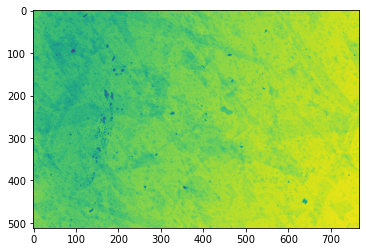

In [16]:
plt.imshow(double_ipca.mean_.reshape(512,768))

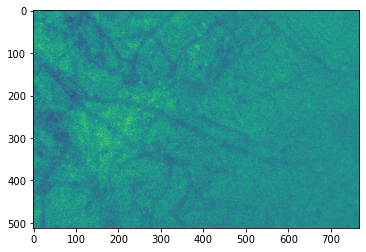

In [53]:
plt.imshow(double_ipca.components_[7].reshape(512,768))

(209, 512, 768)

In [54]:
components_to_remove = 1
double_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = even_more_processed_tifs_array[pos_in_list]-double_ipca.mean_
        non_zero_black_count = np.count_nonzero(even_more_processed_tifs_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(even_more_processed_tifs_array[pos_in_list])):
            if even_more_processed_tifs_array[pos_in_list][l]<15:
                below_cutoff.append(even_more_processed_tifs_array[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
            
            
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (double_ipca_tiffs[pos_in_list][m]*double_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        zero_black_count = len(even_more_processed_tifs_array[pos_in_list])-np.count_nonzero(even_more_processed_tifs_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
            else:
                threshold = 10
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        double_processed_tifs.append(to_save)

1 1
0
1 2
0
1 3
0
1 4
0
1 5
0
1 6
0
1 7
0
1 8
0
1 9
0
1 10
0
1 11
0
2 1
0
2 2
0
2 3
0
2 4
0
2 5
0
2 6
0
2 7
0
2 8
0
2 9
0
2 10
0
2 11
0
3 1
0
3 2
0
3 3
0
3 4
0
3 5
0
3 6
0
3 7
0
3 8
0
3 9
0
3 10
0
3 11
0
4 1
0
4 2
0
4 3
0
4 4
0
4 5
0
4 6
0
4 7
0
4 8
0
4 9
0
4 10
0
4 11
0
5 1
0
5 2
0
5 3
0
5 4
0
5 5
0
5 6
0
5 7
0
5 8
0
5 9
0
5 10
0
5 11
0
6 1
0
6 2
0
6 3
0
6 4
0
6 5
0
6 6
0
6 7
0
6 8
0
6 9
0
6 10
0
6 11
0
7 1
0
7 2
0
7 3
0
7 4
0
7 5
0
7 6
0
7 7
0
7 8
0
7 9
0
7 10
0
7 11
0
8 1
0
8 2
0
8 3
0
8 4
0
8 5
0
8 6
0
8 7
0
8 8
0
8 9
0
8 10
0
8 11
0
9 1
0
9 2
0
9 3
0
9 4
0
9 5
0
9 6
0
9 7
0
9 8
0
9 9
0
9 10
0
9 11
0
10 1
0
10 2
0
10 3
0
10 4
0
10 5
0
10 6
0
10 7
0
10 8
0
10 9
0
10 10
0
10 11
0
11 1
0
11 2
0
11 3
0
11 4
0
11 5
0
11 6
0
11 7
0
11 8
0
11 9
0
11 10
0
11 11
0
12 1
0
12 2
0
12 3
0
12 4
0
12 5
0
12 6
0
12 7
0
12 8
0
12 9
0
12 10
0
12 11
0
13 1
0
13 2
0
13 3
0
13 4
0
13 5
0
13 6
0
13 7
0
13 8
0
13 9
0
13 10
0
13 11
0
14 1
0
14 2
0
14 3
0
14 4
0
14 5
0
14 6
0
14 7
0
14 8
0
14 9
0
14 10
0
1